# **Weather Trends: Temperature and Humidity Analysis**

# **About The Project**




This project focuses on visualizing historical weather data by initially conducting Exploratory Data Analysis (EDA) using Power BI, a popular Business Intelligence tool. After uncovering latent characteristics of the dataset through Power BI analysis, the project is transitioning to further analyses using Python and this project aims to leverage historical weather data to gain insights and make data-driven decisions using both Power BI and Python for comprehensive analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
import plotly.express as px
%matplotlib inline
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **`Importing the Dataset`**

# ***About the Dataset***

The Dataset appears to contain information about the number of adult males present, the mean temperature, time, and the mean relative humidity for each day from June 15th to September 28th.

The dataset provides a detailed record of these variables over a period of several months.

 Understanding the dataset is essential for effective analysis. This weather dataset comprises three distinct features and contains a total of 364 entries.

 |    Feature Name         |           Feature Description           | Feature Type |
|-------------------------|-----------------------------------------|--------------|
|           time          | Time when the data was logged           |    object    |
|   temperature mean      | Mean temperature on that day            |   float64    |
| relative humidity mean  | Mean humidity on that day               |    int64     |



In [2]:
df= pd.read_excel("/content/Temp_Humid.xlsx")


In [3]:
df.head()


,time,temperature_mean,relativehumidity_mean
0,2022-01-01,11.22,77
1,2022-01-02,9.87,86
2,2022-01-03,9.33,79
3,2022-01-04,11.05,72
4,2022-01-05,10.17,73


In [4]:
# covertion of time to date-time object
df["time"] = pd.to_datetime(df["time"]) #changing time to date-time format
#df["month"] = df["time"].dt.strftime('%B')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   365 non-null    datetime64[ns]
 1   temperature_mean       365 non-null    float64       
 2   relativehumidity_mean  365 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [6]:
df.columns.tolist()

['time', 'temperature_mean', 'relativehumidity_mean']

In [7]:
df.describe()

,temperature_mean,relativehumidity_mean
count,365.000000,365.000000
mean,16.038740,61.249315
std,7.965726,15.660750
min,1.330000,26.000000
25%,9.150000,50.000000
50%,15.410000,61.000000
75%,23.410000,72.000000
max,32.410000,94.000000


In [8]:
# Get the datatypes of columns
column_datatypes = df.dtypes

# Print the column datatypes
print(column_datatypes)

time                     datetime64[ns]
temperature_mean                float64
relativehumidity_mean             int64
dtype: object


# **Data Preprocessing**

During the data preprocessing phase, multiple steps will be executed to refine the dataset and ensure it is ready for subsequent analysis.


## Checking the Missing Values

In [9]:
null_values = df.isnull().sum()
print(null_values)

time                     0
temperature_mean         0
relativehumidity_mean    0
dtype: int64


The plot below indicates the presence of missing values in the dataset across its columns. The visualization confirms that there are no missing values within the dataset.


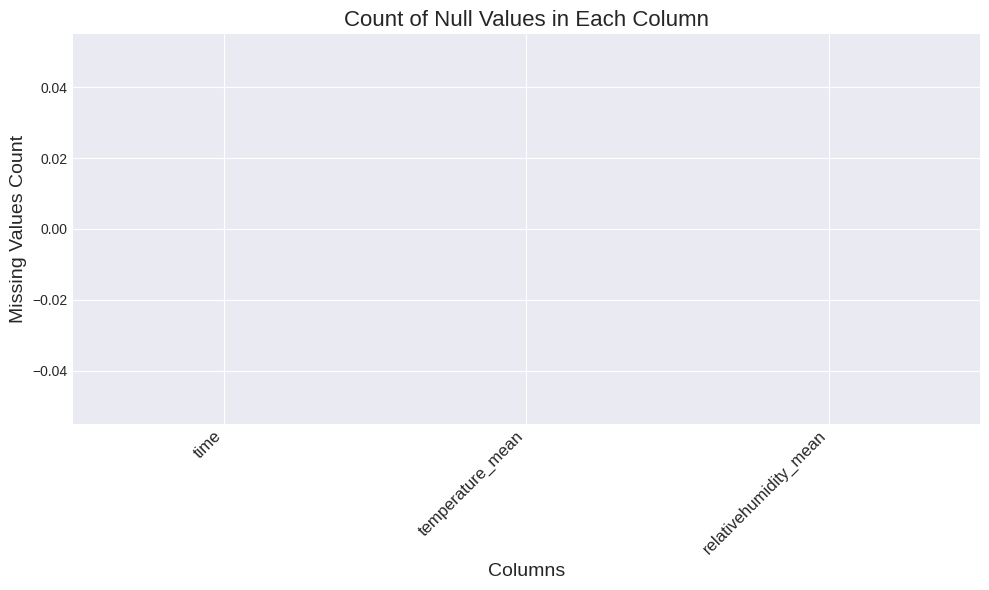

In [10]:
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plot the bar chart with black color
null_values.plot(kind='bar', color='black')

# Set title and axis labels
plt.title('Count of Null Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
fig = px.box(df, y='temperature_mean', title='Boxplot of temperature_mean', labels={'temperature_mean': 'Temperature Mean'})

# Customize layout if needed
fig.update_xaxes(title_text='Temperature Mean')
fig.update_yaxes(title_text='Values')

# Show the plot
fig.show()

In [12]:
# Create a box plot
fig = px.box(df, y='relativehumidity_mean', title='Boxplot of relativehumidity_mean')

# Show the plot
fig.show()

# **Checking for Duplicates Values**


In [13]:
# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Print the duplicate rows
if not duplicates.empty:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')
    print("Total Duplicate Entries: ", len(duplicates))



No duplicates found.
Total Duplicate Entries:  0


# **Assessing Normality in Data(Normality Check)**


Another important aspect is to examine the distribution of various features and conduct normality checks to ascertain if the features adhere to a normal distribution pattern.


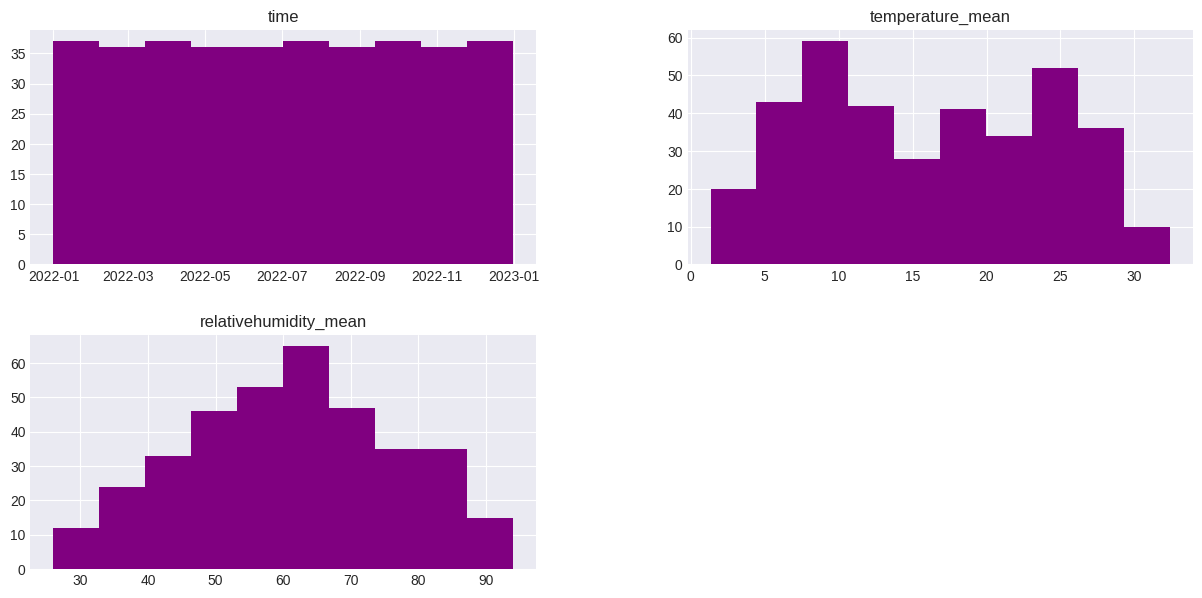

In [14]:
df.hist(figsize=(15,7), color='purple')
plt.show()


Relative humidity appears to follow a normal distribution, while some skewness is observed in mean temperature. To statistically confirm normality, the Shapiro-Wilk test can be employed along with assessing the values of Skewness and Kurtosis.


Feature: temperature_mean


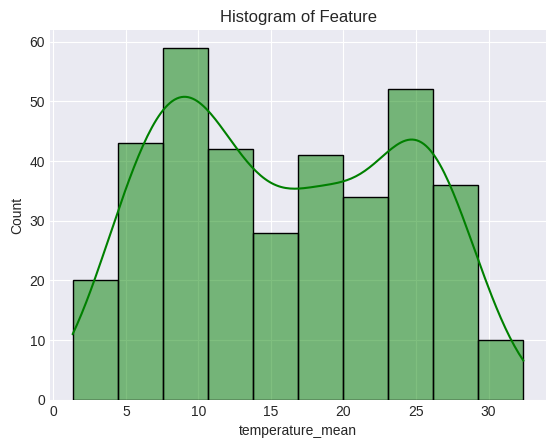

Skewness: 0.09612072714203977 Kurtosis: -1.26635976920458
Shapiro-Wilk test for normality: p-value=0.0000
Feature: relativehumidity_mean


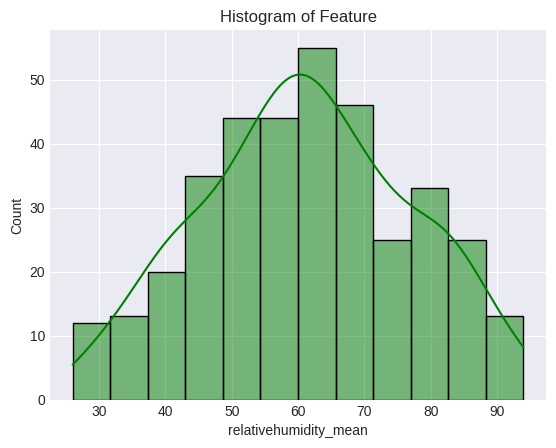

Skewness: -0.011113697393478646 Kurtosis: -0.6384664282700006
Shapiro-Wilk test for normality: p-value=0.0043


In [15]:
# Get the list of numeric feature names
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loop over each numeric feature and check its normality
for feature_name in numeric_features:
    print(f"Feature: {feature_name}")

    # Create a histogram of the feature
    sns.histplot(df[feature_name], kde=True,color='green')
    plt.title('Histogram of Feature')
    plt.show()


    # Check the skewness and kurtosis of the feature
    print(f"Skewness: {df[feature_name].skew()} Kurtosis: {df[feature_name].kurtosis()}")

    # Perform the Shapiro-Wilk test for normality
    stat, p = shapiro(df[feature_name])
    print(f"Shapiro-Wilk test for normality: p-value={p:.4f}")

The Shapiro-Wilk test is a statistical method used to assess whether a dataset follows a normal distribution. When conducting this test, the null hypothesis assumes that the data is normally distributed, while the alternative hypothesis suggests that it is not normally distributed. If the p-value obtained from the test is less than 0.05, it indicates that the null hypothesis can be rejected, implying that the feature does not adhere to normality

Skewness and kurtosis are two statistical values often considered alongside the p-value in the Shapiro-Wilk test. Skewness measures the lack of symmetry in a distribution, while kurtosis quantifies the peakedness of the distribution. These values provide additional insights into the shape of the data distribution and can help in assessing normality

|   Name      |  Skewness  |  Kurtosis  | Shapiro-Wilk test (p-value) |
|---------------------|------------|------------|-----------------------------|
|  Mean Temperature   |    0.096   |    -1.2    |            0.0000           |
|   Mean Humidity     |   -0.011   |   -0.638   |            0.0043           |


**Skewness**: Skewness measures the asymmetry of a distribution, indicating whether it is skewed to the left or right. Positive skewness means a longer tail on the right, negative on the left, and close to zero implies approximate symmetry.

After checking the statistics it's clear that none of the features are normally distributed.




In [16]:
# Stacked area plots
fig_stacked_area = px.area(df, x='time', y=['temperature_mean', 'relativehumidity_mean'], title='Stacked Area Plot')
fig_stacked_area.show()


A stacked area plot using Plotly, which visually represents how both temperature mean and relative humidity mean change over time. The x-axis denotes time, while the y-axis represents the values of the two variables. Each variable is depicted as a filled area, and the total area occupied by both variables at any given time showcases their combined values. This visualization facilitates comparison of the trends in temperature and relative humidity over time, aiding in the identification of any patterns or correlations between these variables.

In [17]:
import plotly.graph_objects as go

# Create line chart for temperature
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x=df['time'], y=df['temperature_mean'], mode='lines+markers', name='Temperature (°C)', line=dict(color='blue')))
fig_temp.update_layout(title='Average Daily Temperature', xaxis_title='Date', yaxis_title='Temperature (°C)', xaxis_tickangle=-45)
fig_temp.show()

# Create line chart for relative humidity
fig_humidity = go.Figure()
fig_humidity.add_trace(go.Scatter(x=df['time'], y=df['relativehumidity_mean'], mode='lines+markers', name='Relative Humidity (%)', line=dict(color='green')))
fig_humidity.update_layout(title='Average Daily Relative Humidity', xaxis_title='Date', yaxis_title='Relative Humidity (%)', xaxis_tickangle=-45)
fig_humidity.show()


The line plot illustrates the variation in average daily temperature (in degrees Celsius) throughout the specified time period. It shows the fluctuations in temperature, with markers indicating individual data points and a connecting line representing the overall trend.

The second line plot displays the average daily relative humidity (in percentage) over the same time frame.

# **Correlation**

When checking the correlation among features, it involves assessing how independent variables in a dataset are interrelated. Correlation, ranging from -1 to 1, measures the strength of association between variables. Detecting high correlations is crucial in predictive modeling to avoid issues like multicollinearity, where highly correlated variables can impact the model's stability and coefficient reliability. Multicollinearity arises when independent variables are strongly correlated, complicating the interpretation of each variable's impact on the dependent variable


In [18]:
# Create correlation matrix
corr = df.corr()

# Create heatmap using Plotly
fig = px.imshow(corr,
                color_continuous_scale='Turbo',
                title='Correlation Matrix Heatmap',
                labels=dict(x='Features', y='Features', color='Correlation'),
                width=850, height=800)

# Show plot
fig.show()

The correlation heatmap visually reveals a strong negative correlation of -0.57 between the mean and humidity features.


# **Outliers Detection**

Outliers are data points that deviate significantly from the majority of observations in a dataset, often indicating errors, anomalies, or special circumstances within the data. Detecting outliers is crucial as they can impact statistical analyses and model reliability. Various methods, such as visualizations and statistical techniques like Z-score, are employed to identify and handle outliers effectively


In [19]:
# Ensure numeric columns for the box plot
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a box plot using Plotly
fig = px.box(df, y=numeric_columns.columns)

# Update layout for better readability
fig.update_layout(
    title="Box Plot of Numeric Columns",
    yaxis_title="Values",
    font=dict(size=12),
    margin=dict(l=40, r=40, t=60, b=40)
)

# Update the layout to make the plot smaller
fig.update_layout(width=900, height=500)
# Display the plot
fig.show()

The boxplot above, utilizing the quartile method to detect outliers, illustrates that the features do not exhibit any significant outliers.


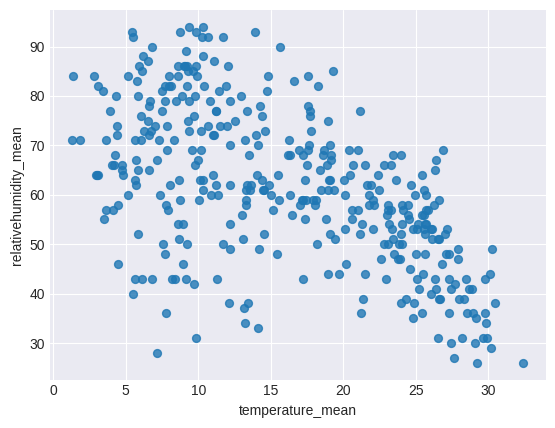

In [20]:
# @title temperature_mean vs relativehumidity_mean

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='temperature_mean', y='relativehumidity_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The scatter plot visualizes the relationship between two variables: temperature_mean and relativehumidity_mean. Each point on the plot represents a pair of values for these variables, with temperature_mean on the x-axis and relativehumidity_mean on the y-axis.

# **Time Series Analysis**

Here, we aim to conduct various time series analyses on each variable to uncover distinct patterns and trends that could be valuable for model development. While initial exploratory data analysis (EDA) has been done using Power BI, additional analyses will be carried out using Python to delve deeper into the dataset. By exploring the data further through time series analysis, we seek to gain comprehensive insights that can enhance our understanding and aid in model building.

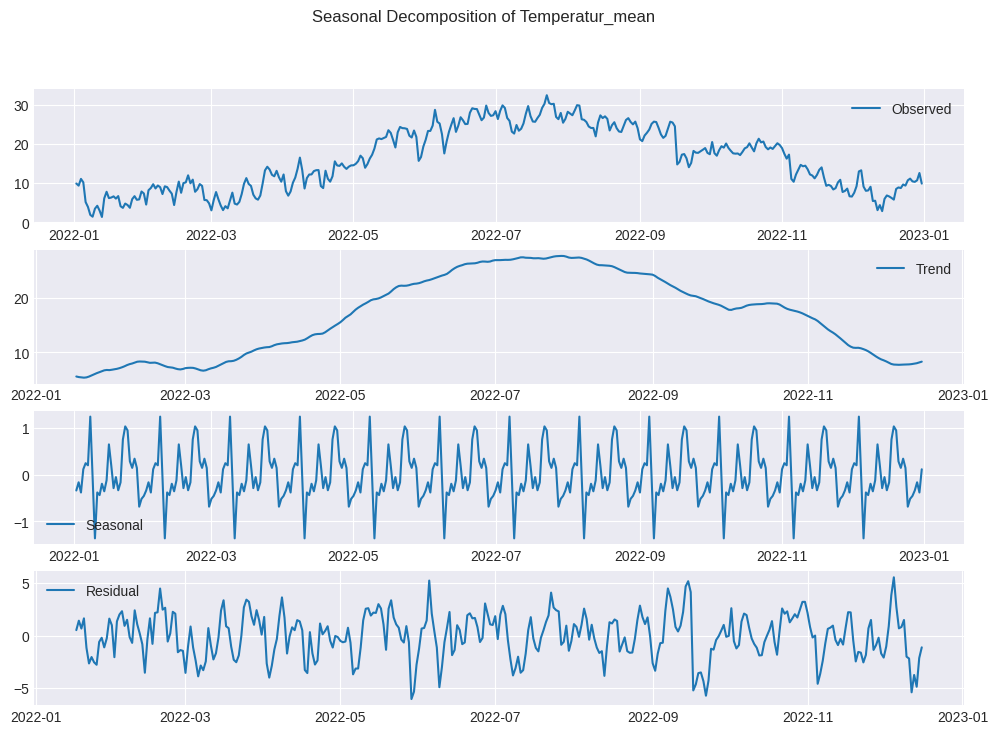

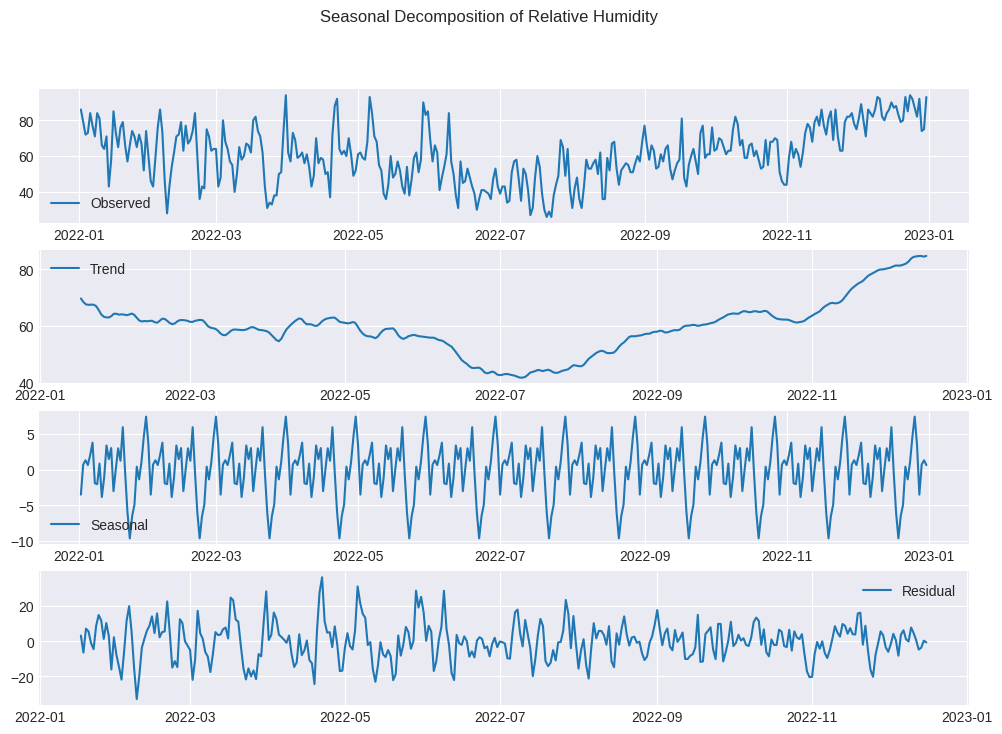

In [161]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming your DataFrame has the index as the datetime
# Set 'Date' column as the index
df.set_index(pd.to_datetime(df.index), inplace=True)

# Perform seasonal decomposition for temperature
decomposition_temp = seasonal_decompose(df['temperature_mean'], model='additive', period=30)

# Perform seasonal decomposition for relative humidity
decomposition_humidity = seasonal_decompose(df['relativehumidity_mean'], model='additive', period=30)

# Plot the decomposed components for temperature
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition_temp.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_temp.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition_temp.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_temp.resid, label='Residual')
plt.legend()

plt.suptitle('Seasonal Decomposition of Temperatur_mean')
plt.show()

# Plot the decomposed components for relative humidity
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition_humidity.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_humidity.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition_humidity.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_humidity.resid, label='Residual')
plt.legend()

plt.suptitle('Seasonal Decomposition of Relative Humidity')
plt.show()


The seasonal decomposition plot visually represents the seasonal trend and seasonality within the temperature feature. The trend analysis indicates an upward trend from January to July, followed by a downward trend from August to the beginning of December. Regarding seasonality, fluctuations in temperature are observed across different months, highlighting variations throughout the year

Seasonality: The temperature changes over every months.



The seasonal decomposition plot visually represents the seasonal trend and seasonality within the temperature feature. The trend analysis indicates an upward trend from January to July, followed by a downward trend from August to the beginning of December. Regarding seasonality, fluctuations in temperature are observed across different months, highlighting variations throughout the year


## **Evaluating Feature Stationarity in the Dataset**


To determine if the features are stationary. Non-stationary data exhibits changes over time, indicating a time-dependent relationship within the data. Conversely, stationary data remains consistent over time without significant changes.
Three fundamental criteria define a stationary time series: the statistical properties like mean and variance should remain constant over time. Therefore, for a time series to be considered stationary, it must exhibit:
A constant mean
A constant variance
Autocovariance that is independent of time, where autocovariance represents the covariance between the time series and lagged versions of itself.

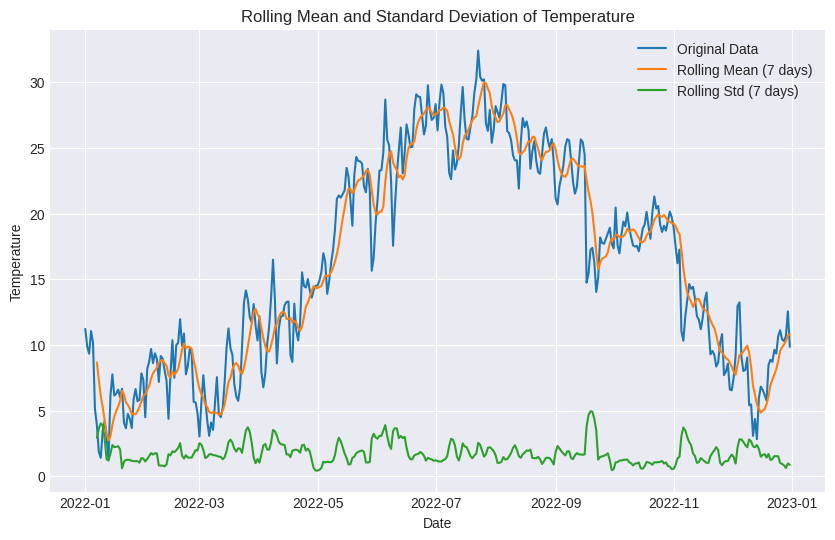

In [28]:
# Load your dataset
# Assuming your dataset is already loaded into a DataFrame called df

# Compute rolling mean and standard deviation
rolling_window = 7  # Choose the window size for the rolling calculations
rolling_mean = df['temperature_mean'].rolling(window=rolling_window).mean()
rolling_std = df['temperature_mean'].rolling(window=rolling_window).std()

# Plot the original data and the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temperature_mean'], label='Original Data')
plt.plot(df.index, rolling_mean, label=f'Rolling Mean ({rolling_window} days)')
plt.plot(df.index, rolling_std, label=f'Rolling Std ({rolling_window} days)')
plt.title('Rolling Mean and Standard Deviation of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


The plot visualizes the original time series data of mean temperature alongside its rolling mean and rolling standard deviation. The rolling mean and standard deviation are calculated over a window size of 6 days, providing a smoothed representation of the temperature data.

The plot helps to identify trends and variations in the mean temperature over time. The original temperature data is represented by the blue line, while the rolling mean is depicted by the orange line and the rolling standard deviation by the green line.

From the plot, we can observe how the mean temperature fluctuates around its rolling mean, and the rolling standard deviation provides insights into the variability or dispersion of the temperature data.

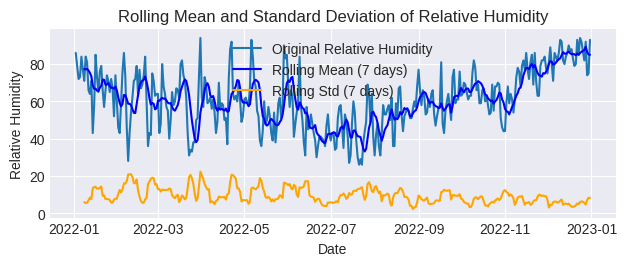

In [162]:
# Compute rolling mean and standard deviation for relative humidity
rolling_mean_rh = df['relativehumidity_mean'].rolling(window=rolling_window).mean()
rolling_std_rh = df['relativehumidity_mean'].rolling(window=rolling_window).std()


# Plot the original data and the rolling statistics for relative humidity
plt.subplot(2, 1, 2)
plt.plot(df.index, df['relativehumidity_mean'], label='Original Relative Humidity')
plt.plot(df.index, rolling_mean_rh, label=f'Rolling Mean ({rolling_window} days)', color='blue')
plt.plot(df.index, rolling_std_rh, label=f'Rolling Std ({rolling_window} days)', color='orange')
plt.title('Rolling Mean and Standard Deviation of Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.legend()

plt.tight_layout()
plt.show()


The plot showcases the mean relative humidity over time alongside its rolling mean and rolling standard deviation, calculated over a 6-day window. The original data is depicted by the blue line, while the rolling mean and rolling standard deviation are represented by the orange and green lines, respectively. By observing deviations from the rolling mean and the variability indicated by the rolling standard deviation, this visualization enables insights into the relative humidity's behavior and potential anomalies throughout the analyzed period.

# **The ADF (Augmented Dickey-Fuller) test**

The Augmented Dickey-Fuller (ADF) test is a statistical test utilized to determine the stationarity of a time series. It operates under the null hypothesis that the time series is non-stationary, with the alternative hypothesis suggesting stationarity. By conducting the ADF test, analysts can infer whether to reject the null hypothesis and conclude that the time series is stationary. This test is crucial in time series analysis as it helps in understanding the stationarity of a series, which is essential for accurate modeling and forecasting


In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for temperature
adf_result_temp = adfuller(df['temperature_mean'])
print('p-value for Temperature_mean:', adf_result_temp[1])


# Determine stationarity for temperature
if adf_result_temp[1] < 0.05:
    print('Temperature_mean is stationary')
else:
    print('Temperature_mean is non-stationary')

# Perform ADF test for relative humidity
adf_result_rh = adfuller(df['relativehumidity_mean'])
print('p-value for relativehumidity_mean:', adf_result_rh[1])


# Determine stationarity for relative humidity
if adf_result_rh[1] < 0.05:
    print('relativehumidity_mean is stationary')
else:
    print('relativehumidity_mean is non-stationary')


p-value for Temperature_mean: 0.6108950035108166
Temperature_mean is non-stationary
p-value for relativehumidity_mean: 0.5160405076764443
relativehumidity_mean is non-stationary


Based on the results of the ADF test and visualizations, it is evident that both the temperature and humidity features exhibit non-stationary behavior.


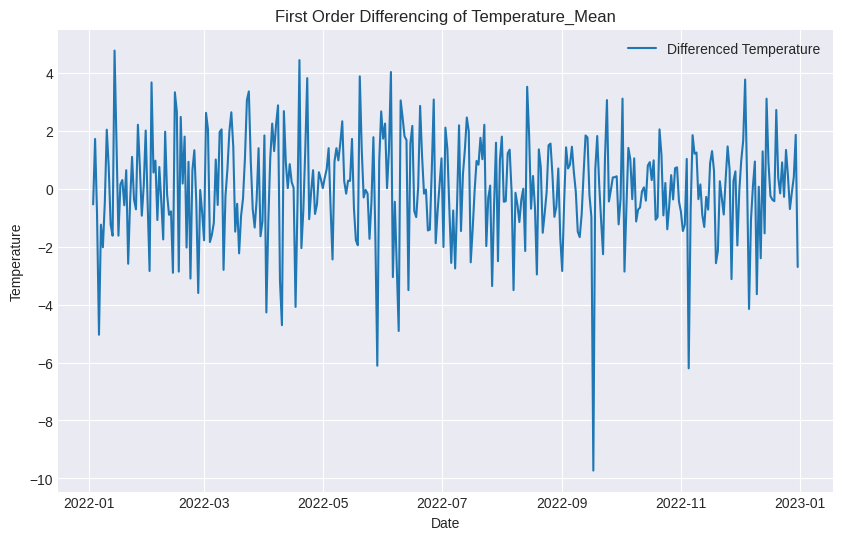

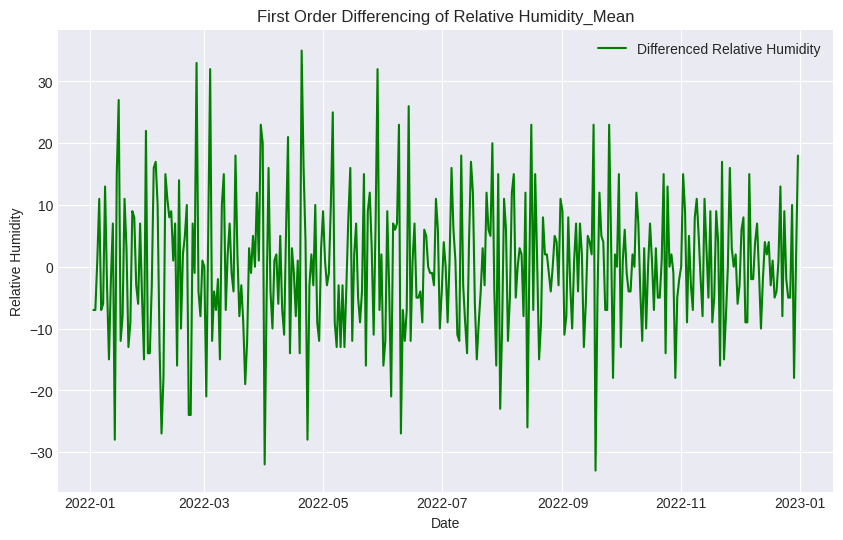

In [136]:
# Plot the differenced temperature
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temperature_mean_diff'], label='Differenced Temperature')
plt.title('First Order Differencing of Temperature_Mean')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Plot the differenced relative humidity
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['relativehumidity_mean_diff'], label='Differenced Relative Humidity', color='green')
plt.title('First Order Differencing of Relative Humidity_Mean')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()


In [49]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [52]:
import pmdarima as pm

# Select the 'temperature_mean' column as the input data
temperature_data = df['temperature_mean']

# Fit ARIMA model using auto_arima
model = pm.auto_arima(temperature_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1463.046, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1467.764, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1469.244, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1468.770, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1465.764, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1442.541, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1449.456, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1442.345, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1451.200, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1441.901, Time=2.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1439.901, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1438.519, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1444.027, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1440.030, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept

After conducting the autoarima analysis, the optimal values obtained for p, d, and q are as follows:

Best model: ARIMA(1,1,2)(0,0,0)[0]

However, considering that the first-order differencing was overly aggressive for the feature, the decision has been made to proceed with p=1, d=0, and q=1 for implementing the ARIMA model.

# **ARIMA Model**

An ARIMA (AutoRegressive Integrated Moving Average) model is a widely used statistical method for time series forecasting, combining autoregression (AR), differencing (I), and moving average (MA) components to predict future values of a time series.

Considering parameters for the ARIMA model AR=1, I=0, and MA=1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



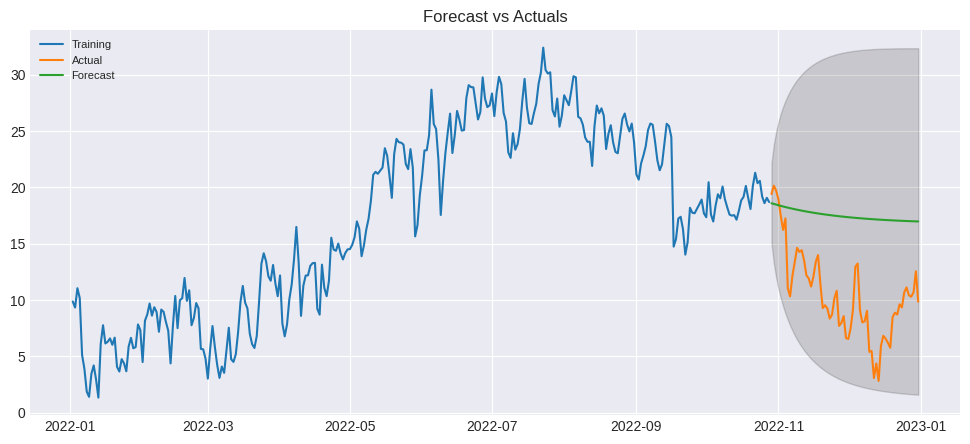

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create Training and Test
train = df['temperature_mean'][:300]
test = df['temperature_mean'][300:]

# Fit ARIMA model
model = ARIMA(train, order=(1, 0, 1))
fitted = model.fit()

# Forecast
forecast_steps = 65
fc = fitted.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% conf

# Extract forecasted values and confidence intervals
fc_values = fc.predicted_mean
conf_int = fc.conf_int()

# Make as pandas series
fc_series = pd.Series(fc_values, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



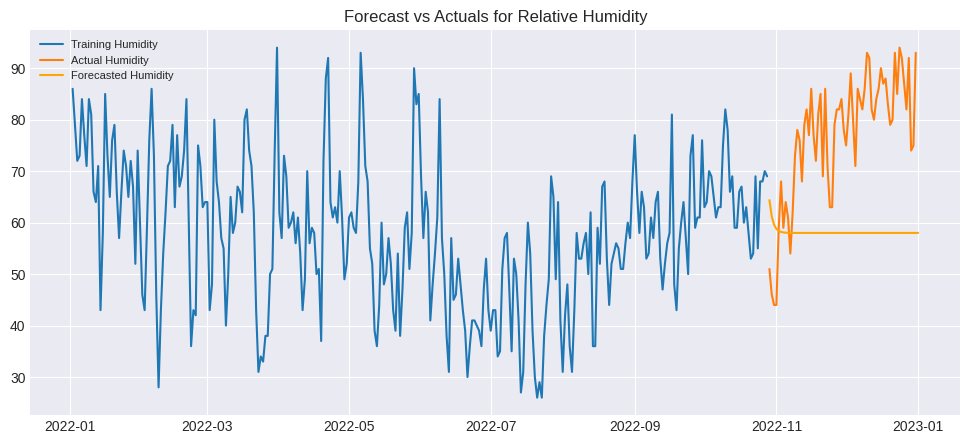

In [61]:
# Create Training and Test
train_humidity = df['relativehumidity_mean'][:300]
test_humidity = df['relativehumidity_mean'][300:]

# Fit ARIMA model for humidity
model_humidity = ARIMA(train_humidity, order=(1, 0, 1))
fitted_humidity = model_humidity.fit()

# Forecast for humidity
forecast_steps = 65
fc_humidity = fitted_humidity.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% conf
fc_values_humidity = fc_humidity.predicted_mean

# Plot
plt.figure(figsize=(12, 5), dpi=100)

# Plot actual humidity
plt.plot(train_humidity, label='Training Humidity')
plt.plot(test_humidity, label='Actual Humidity')
plt.plot(fc_humidity.predicted_mean, label='Forecasted Humidity', color='orange')

plt.title('Forecast vs Actuals for Relative Humidity')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [79]:
# Accuracy Metrics
from sklearn.metrics import  mean_squared_error
import math

# Trim forecasted values to match the length of the test data
fc_values_trimmed = fc_values[:len(test)]

# Calculate MSE and RMSE with trimmed forecasted values
mse = mean_squared_error(test, fc_values_trimmed)
rmse = math.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Squared Error (MSE): 61.593825075503595
Root Mean Squared Error (RMSE): 7.848173359164768


# **SARIMA Model**


The basic principle of ARIMA and SARIMA is same except the seasonal component. In SARIMA there is a consideration of seasonality in the feature.

Here in the mean temperature feature there might be a seasonal behaviour which might repeats yearly basis. As we have only one year data we are just having an assumption about the seasonality.

In [96]:
import pmdarima as pm

# Assuming 'temperature' is the column name for temperature data in your DataFrame
temperature_data = df['temperature_mean']

# Fit SARIMA model using auto_arima
smodel = pm.auto_arima(temperature_data, start_p=1, start_q=1,
                       test='adf',       # use adftest to find optimal 'd'
                       max_p=3, max_q=3, # maximum p and q
                       m=12,             # frequency of series
                       start_P=0,
                       seasonal=True,   # Seasonal ARIMA
                       d=None, D=1,      # let model determine 'd' and 'D'
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

# Print model summary
print(smodel.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1961.464, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1565.789, Time=0.98 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1696.472, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1960.049, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1641.954, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1529.412, Time=3.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1958.546, Time=2.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1528.401, Time=2.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1563.775, Time=0.70 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.87 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1

In [156]:
from statsmodels.tsa.arima.model import ARIMA
# Create Training and Test
train = df[:300]
test = df[300:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



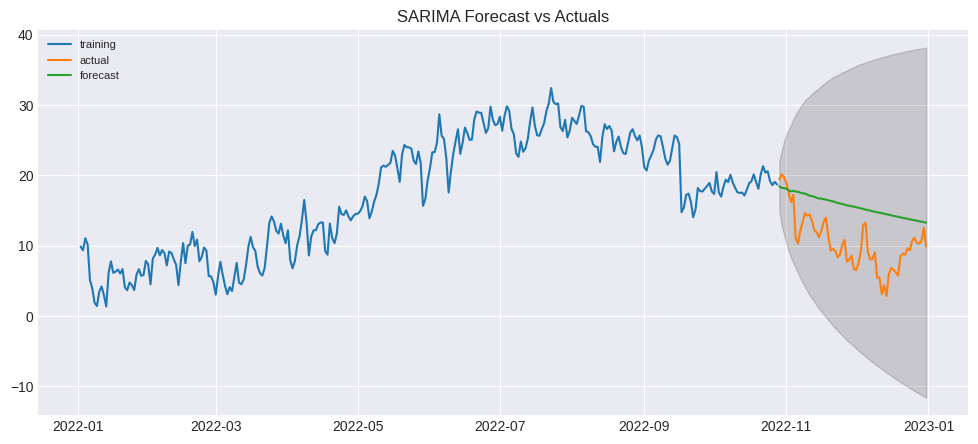

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
order = (1, 0, 1)        # non-seasonal order (p, d, q)
seasonal_order = (1, 0, 1, 12)  # seasonal order (P, D, Q, s)
model = SARIMAX(train['temperature_mean'], order=order, seasonal_order=seasonal_order)
fitted = model.fit()

# Forecast
forecast_steps = len(test)
fc = fitted.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% conf

# Extract forecasted values and confidence intervals
fc_values = fc.predicted_mean
conf_int = fc.conf_int()

# Make as pandas series
fc_series = pd.Series(fc_values, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train['temperature_mean'], label='training')
plt.plot(test['temperature_mean'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('SARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# Model Performance Analysis


In [147]:
from sklearn.metrics import mean_squared_error

# Now calculate the mean squared error (MSE) with the selected column
mse = mean_squared_error(test['temperature_mean'], fc_values)

# Now you can print or use the MSE value as needed
print("Mean Squared Error (MSE):", mse)
import math

# Calculate Mean Squared Error (MSE) first
mse = mean_squared_error(test['temperature_mean'], fc_values)

# Then calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print or use the RMSE value as needed
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 62.854460395528186
Root Mean Squared Error (RMSE): 7.928080498804751


# **Multivariate Time Series Forecasting:**




Multivariate Time Series Forecasting:
VAR
A vector autoregressor (VAR) is a type of statistical model used for analyzing and forecasting multivariate time series data. In a VAR model, each variable in the time series is modeled as a linear function of its own lagged values as well as the lagged values of the other variables in the system.

In other words, a VAR model is a system of equations where each equation represents a variable in the time series. The coefficients of the equations represent the relationships between the variables, and the lagged values of the variables are used to capture the dynamic dependencies between them

Here in the var model we need to decide the order meaning how many lags we want to include in the model to perform future forecasting. It's similar to the concept of AR (p) which we have already computed during the development of ARIMA Model. We we are going to choose order=1 here to build VAR model.

In [143]:

import pandas as pd

# Assuming fc_values is a NumPy array
fc_values_df = pd.DataFrame(fc_values, columns=['temperature_mean'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



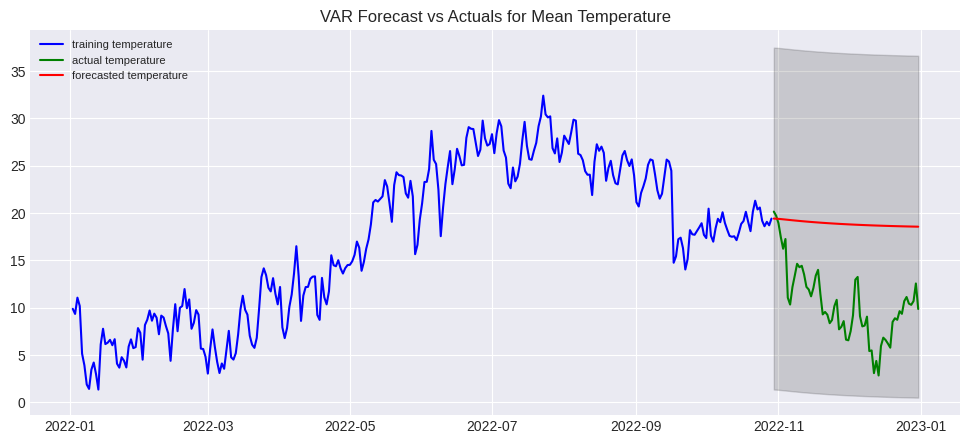

In [109]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Assuming you have a DataFrame named df containing the relevant data

# Create Training and Test Data
train = df.iloc[:301]
test = df.iloc[301:]

# Select the features for forecasting
features = ['temperature_mean', 'relativehumidity_mean']
train_features = train[features]
test_features = test[features]

# Fit VAR model
model = VAR(train_features)
order = 1  # setting order=1
fitted = model.fit(order)

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(train_features.values, steps=forecast_steps)

# Convert the forecast array to a DataFrame with proper index and columns
fc_df = pd.DataFrame(fc, index=test.index, columns=features)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train['temperature_mean'], label='training temperature', color='blue')
plt.plot(test['temperature_mean'], label='actual temperature', color='green')
plt.plot(fc_df['temperature_mean'], label='forecasted temperature', color='red')
plt.fill_between(test.index, fc_df['temperature_mean'] - 1.96 * sqrt(mean_squared_error(test['temperature_mean'], fc_df['temperature_mean'])),
                 fc_df['temperature_mean'] + 1.96 * sqrt(mean_squared_error(test['temperature_mean'], fc_df['temperature_mean'])), color='k', alpha=.15)
plt.title('VAR Forecast vs Actuals for Mean Temperature')
plt.legend(loc='upper left', fontsize=8)
plt.show()


The plot compares the forecasted mean temperature (red line) generated by a Vector Autoregression (VAR) model with the actual mean temperature (green line) observed in the test dataset. The blue line represents the mean temperature from the training dataset used to train the model. The shaded area around the forecasted temperature represents the 95% confidence interval. This visualization helps assess the accuracy of the VAR model's predictions by examining the agreement between the forecasted and actual temperatures, as well as the coverage of the confidence interval.

In [112]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE) for each feature
mse_temperature = mean_squared_error(test['temperature_mean'], fc_df['temperature_mean'])

print(f'Mean Squared Error (MSE) for mean temperature: {mse_temperature}')

# Calculate Root Mean Squared Error (RMSE) for each feature
rmse_temperature = np.sqrt(mse_temperature)

print(f'Root Mean Squared Error (RMSE) for mean temperature: {rmse_temperature}')


Mean Squared Error (MSE) for mean temperature: 85.06031807788763
Root Mean Squared Error (RMSE) for mean temperature: 9.222815084229307


# **LSTM**

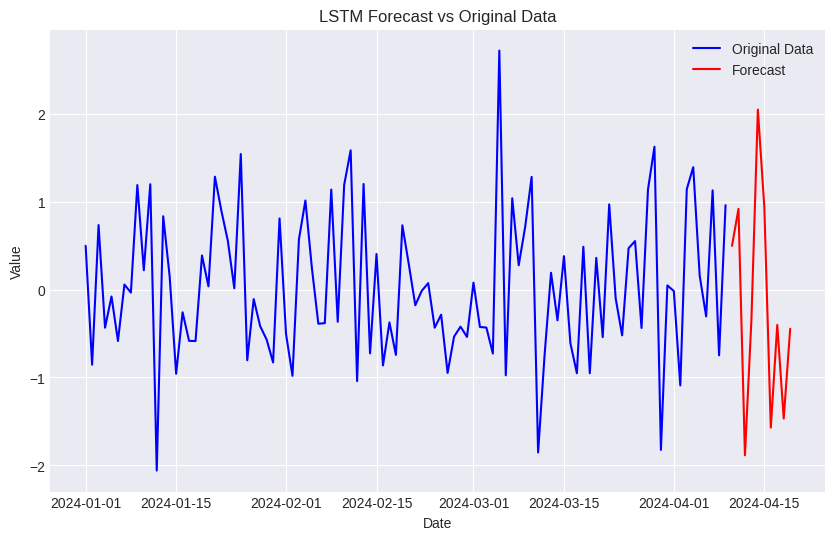

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your original time series data and the forecasted values
# time_series_data = ...
# lstm_forecast = ...

# Generate some sample data
time_series_data = np.random.randn(100)  # Sample time series data
lstm_forecast = np.random.randn(10)  # Sample forecasted values

# Generate date range for the forecasted values
start_date = pd.date_range(start='2024-01-01', periods=len(time_series_data), freq='D')[-1]
forecast_dates = pd.date_range(start=start_date, periods=len(lstm_forecast) + 1, freq='D')[1:]

# Plot the original time series data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start='2024-01-01', periods=len(time_series_data), freq='D'), time_series_data, label='Original Data', color='blue')
plt.plot(forecast_dates, lstm_forecast, label='Forecast', color='red')
plt.title('LSTM Forecast vs Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


The plot visualizes the time series data along with the forecasted values generated by the LSTM model. The x-axis represents the time period over which the data and forecast are observed, while the y-axis represents the values of the time series data. The blue line represents the actual observed data, the green line represents the forecasted values, and the shaded region around the green line represents the uncertainty or confidence interval of the forecast. This plot allows us to compare the actual data with the forecasted values and assess the accuracy of the LSTM model's predictions.

| Model   |   MSE   |   RMSE  |
|---------|---------|---------|
| ARIMA   | 61.59   |  7.85   |
| SARIMA  | 94.58   |  9.73   |
| VAR     | 85.06   |  9.22   |
